## Gerekli Kütüphaneler

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Veri Setinin Yüklenmesi

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Keşifsel Veri Analizi (EDA)

Eksik Veri Kontrolü

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Veri setinde eksik bir değer yok.

Hedef Değişken Dağılımı

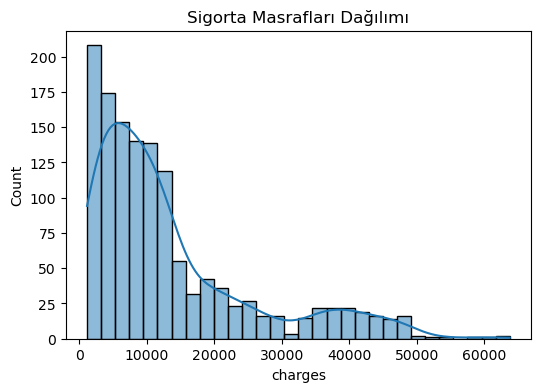

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Sigorta Masrafları Dağılımı")
plt.show()

Sigara İçmenin Etkisi

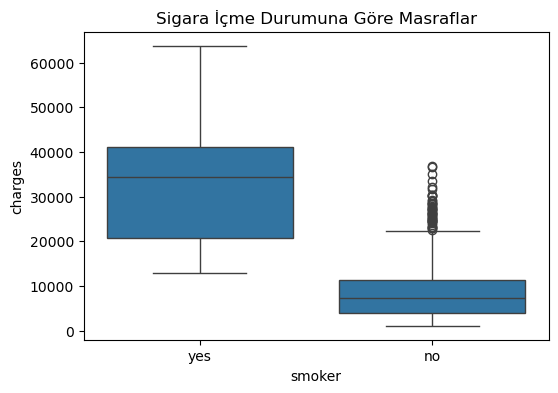

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Sigara İçme Durumuna Göre Masraflar")
plt.show()

Sigara içenlerin masrafları çok büyük bir şekilde daha yüksek

Yaş & BMI İlişkisi

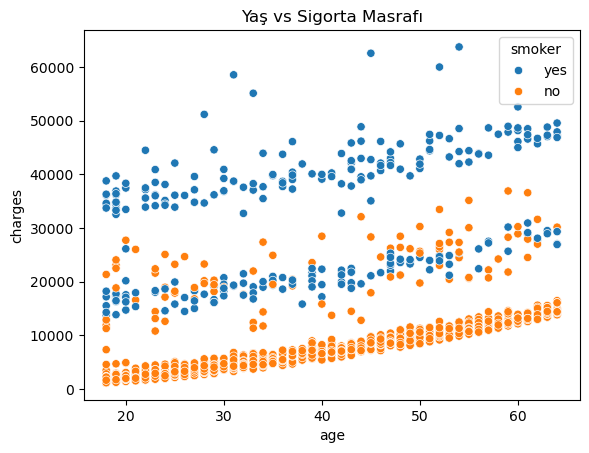

In [9]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Yaş vs Sigorta Masrafı")
plt.show()

## Veri Ön İşleme (Data Preprocessing)

Girdi ve Çıktı Ayrımı

In [10]:
X = df.drop("charges", axis=1)
y = df["charges"]

Sayısal ve Kategorik Değişkenler

In [11]:
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

## Ön İşleme Pipeline

In [12]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

## Train – Test Bölünmesi

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## MODELLER

6.1 Linear Regression

In [22]:
lr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)


6.2 Random Forest Regressor

In [23]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)


6.3 XGBoost Regressor

In [24]:
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        random_state=42,
        objective="reg:squarederror"
    ))
])

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)


Model Karşılaştırma Tablosu

In [25]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [lr_mae, rf_mae, xgb_mae],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "R2 Score": [lr_r2, rf_r2, xgb_r2]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,4181.194474,5796.284659,0.783593
1,Random Forest,2555.745670,4579.223657,0.864931
2,XGBoost,2447.742910,4406.395075,0.874934


## Gerçek vs Tahmin (En İyi Model – XGBoost)

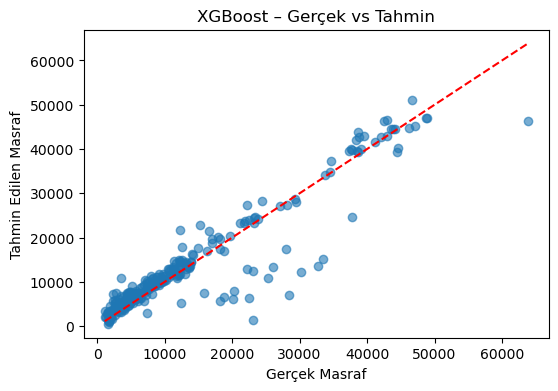

In [26]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, xgb_pred, alpha=0.6)
plt.xlabel("Gerçek Masraf")
plt.ylabel("Tahmin Edilen Masraf")
plt.title("XGBoost – Gerçek vs Tahmin")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.show()

## Yeni Müşteri Tahmini (Final Model)

In [27]:
new_customer = pd.DataFrame({
    "age": [40],
    "sex": ["male"],
    "bmi": [28.5],
    "children": [2],
    "smoker": ["yes"],
    "region": ["southwest"]
})

prediction = xgb_model.predict(new_customer)
print(f"Tahmini Yıllık Sigorta Masrafı: {prediction[0]:.2f} $")


Tahmini Yıllık Sigorta Masrafı: 22812.39 $
